<a href="https://colab.research.google.com/github/ananyaarya02/TicketMind/blob/main/Exploring_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd
import nltk
import html
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [2]:
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")
print("Path to dataset files:", path)

100%|██████████| 16.1M/16.1M [00:00<00:00, 84.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14


In [3]:
subfolders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

print("Subfolders:", subfolders)
print("Files:", files)

Subfolders: []
Files: ['dataset-tickets-german_normalized.csv', 'dataset-tickets-multi-lang3-4k.csv', 'dataset-tickets-german_normalized_50_5_2.csv', 'dataset-tickets-multi-lang-4-20k.csv', 'aa_dataset-tickets-multi-lang-5-2-50-version.csv']


In [4]:
data="/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/dataset-tickets-multi-lang-4-20k.csv"
df = pd.read_csv(data)


In [5]:
df.head(10)

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN
5,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature,IT,Tech Support,NaN,NaN,NaN
6,Ratung für Sicherung medizinischer Daten in Hu...,"Ratung, ob es möglich ist, Sicherung medizinis...","Wir freuen uns, Ihnen zu raten, Sicherung medi...",Request,Technical Support,medium,de,Backup,Security,IT,Tech Support,NaN,NaN,NaN,NaN
7,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug,Resolution,Outage,Documentation,NaN,NaN
8,Assistance Request,"Dear Customer Support, I am writing in regards...",I have received your report about the data blo...,Problem,Product Support,high,de,Technical,Bug,Security,Maintenance,Documentation,Resolution,NaN,NaN
9,Support Request,The latest data analysis reports are inconsist...,Please provide additional details for further ...,Problem,Product Support,high,de,Bug,Performance,IT,Tech Support,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)

(20000, 15)


In [7]:
null_values=df.isnull().any()
print(null_values)

subject      True
body         True
answer       True
type        False
queue       False
priority    False
language    False
tag_1       False
tag_2        True
tag_3        True
tag_4        True
tag_5        True
tag_6        True
tag_7        True
tag_8        True
dtype: bool


In [8]:
total_null_values=df.isnull().sum()
print(total_null_values)

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64


In [9]:
df=df.drop("tag_2",axis=1)
df=df.drop("tag_3",axis=1)
df=df.drop("tag_4",axis=1)
df=df.drop("tag_5",axis=1)
df=df.drop("tag_6",axis=1)
df=df.drop("tag_7",axis=1)
df=df.drop("tag_8",axis=1)
df=df.drop("answer",axis=1)

In [10]:
total_null_values=df.isnull().sum()
print(total_null_values)

subject     1461
body           2
type           0
queue          0
priority       0
language       0
tag_1          0
dtype: int64


In [11]:
df['subject'] = df['subject'].fillna('')
df['body'] = df['body'].fillna('')

In [12]:
total_null_values=df.isnull().sum()
print(total_null_values)

subject     0
body        0
type        0
queue       0
priority    0
language    0
tag_1       0
dtype: int64


In [13]:
most_tag1=df['tag_1'].value_counts().idxmax()
print(most_tag1)

Technical


In [14]:
# Unique languages
unique_languages = df['language'].unique()
print("Unique languages:", unique_languages)

# Count of tickets per language
language_counts = df['language'].value_counts()
print("Tickets per language:\n", language_counts)

Unique languages: ['de' 'en']
Tickets per language:
 language
en    11923
de     8077
Name: count, dtype: int64


In [15]:
from bs4 import BeautifulSoup

def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

In [16]:
df['subject'] = df['subject'].fillna('').apply(clean_html)
df['body'] = df['body'].fillna('').apply(clean_html)

In [17]:
import string
string.punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df['subject']= df['subject'].apply(lambda x:remove_punctuation(x))
df['body']= df['body'].apply(lambda x:remove_punctuation(x))
df.head()

,subject,body,type,queue,priority,language,tag_1
0,Unvorhergesehener Absturz der DatenanalysePlat...,Die DatenanalysePlattform brach unerwartet ab ...,Incident,General Inquiry,low,de,Crash
1,Customer Support Inquiry,Seeking information on digital strategies that...,Request,Customer Service,medium,en,Feedback
2,Data Analytics for Investment,I am contacting you to request information on ...,Request,Customer Service,medium,en,Technical
3,KrankenhausDienstleistungProblem,Ein MedienDatenSperrverhalten trat aufgrund un...,Incident,Customer Service,high,de,Security
4,Security,Dear Customer Support I am reaching out to inq...,Request,Customer Service,medium,en,Security


In [18]:
df[['subject', 'body']] = df[['subject', 'body']].apply(lambda x: x.str.lower())

In [19]:
import re

def tokenization(text):
    if isinstance(text, str):
        tokens = re.split('\W+', text)
        return tokens
    return []

df[['subject', 'body']] = df[['subject', 'body']].applymap(tokenization)
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-1900022494.py:5: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)
/tmp/ipython-input-1900022494.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['subject', 'body']] = df[['subject', 'body']].applymap(tokenization)


,subject,body,type,queue,priority,language,tag_1
0,"[unvorhergesehener, absturz, der, datenanalyse...","[die, datenanalyseplattform, brach, unerwartet...",Incident,General Inquiry,low,de,Crash
1,"[customer, support, inquiry]","[seeking, information, on, digital, strategies...",Request,Customer Service,medium,en,Feedback
2,"[data, analytics, for, investment]","[i, am, contacting, you, to, request, informat...",Request,Customer Service,medium,en,Technical
3,[krankenhausdienstleistungproblem],"[ein, mediendatensperrverhalten, trat, aufgrun...",Incident,Customer Service,high,de,Security
4,[security],"[dear, customer, support, i, am, reaching, out...",Request,Customer Service,medium,en,Security


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df[['subject', 'body']]= df[['subject', 'body']].apply(lambda x:remove_stopwords(x))


In [22]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [23]:
lemmatizer = WordNetLemmatizer()

# POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

# lemmatize
def lemmatize_with_estimated_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

for i, row in df.iterrows():
    df.at[i, 'subject'] = lemmatize_with_estimated_pos(row['subject'])
    df.at[i, 'body'] = lemmatize_with_estimated_pos(row['body'])

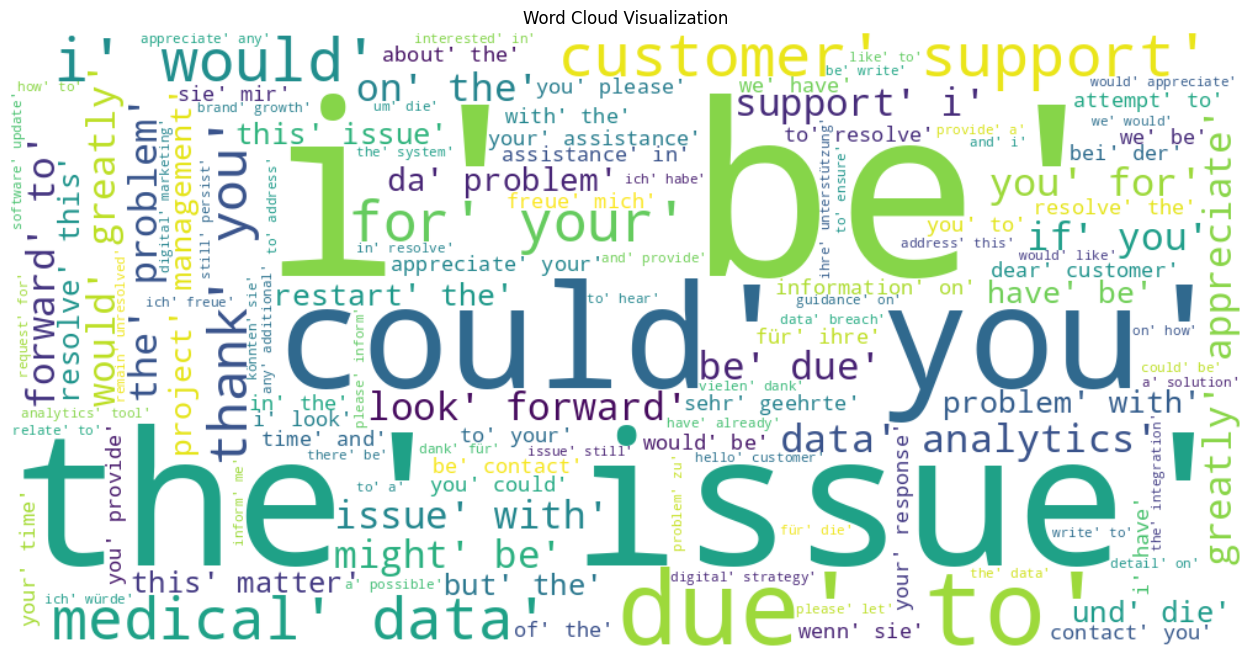

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
corpus = df['subject'].astype(str) + df['body'].astype(str)
word_cloud = ' '.join(corpus)
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    min_font_size=10
).generate(word_cloud)
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud Visualization')
plt.axis("off")
plt.show()

In [26]:
print(df[['subject','body']].head(5))


                                             subject  \
0  [unvorhergesehener, absturz, der, datenanalyse...   
1                       [customer, support, inquiry]   
2                 [data, analytics, for, investment]   
3                 [krankenhausdienstleistungproblem]   
4                                         [security]   

                                                body  
0  [die, datenanalyseplattform, brach, unerwartet...  
1  [seek, information, on, digital, strategy, tha...  
2  [i, be, contact, you, to, request, information...  
3  [ein, mediendatensperrverhalten, trat, aufgrun...  
4  [dear, customer, support, i, be, reach, out, t...  


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

subject_vectorizer = TfidfVectorizer(
    max_features=5000,
)

body_vectorizer = TfidfVectorizer(
    max_features=20000,
)

In [28]:
X_sub_train, X_sub_test, X_body_train, X_body_test= train_test_split(
    df['subject'], df['body'], test_size=0.2, random_state=42)



In [30]:
X_sub_train = [" ".join(x) for x in X_sub_train]
X_sub_test  = [" ".join(x) for x in X_sub_test]

X_body_train = [" ".join(x) for x in X_body_train]
X_body_test  = [" ".join(x) for x in X_body_test]


In [31]:
X_sub_train_vec = subject_vectorizer.fit_transform(X_sub_train)
X_sub_test_vec  = subject_vectorizer.transform(X_sub_test)

X_body_train_vec = body_vectorizer.fit_transform(X_body_train)
X_body_test_vec  = body_vectorizer.transform(X_body_test)

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
X_lang= ohe.fit_transform(df[['language']])
X_lang

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20000 stored elements and shape (20000, 2)>

In [33]:
X_lang_train,X_lang_test = train_test_split(X_lang, test_size=0.2, random_state=42)

In [34]:
X_train = hstack([X_sub_train_vec, X_body_train_vec,X_lang_train])
X_test  = hstack([X_sub_test_vec, X_body_test_vec,X_lang_test])

In [35]:
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
le_queue = LabelEncoder()
le_priority = LabelEncoder()

y_type = le_type.fit_transform(df['type'])
y_queue = le_queue.fit_transform(df['queue'])
y_priority = le_priority.fit_transform(df['priority'])


In [36]:
y = np.vstack([y_type, y_queue, y_priority]).T


In [37]:
y_train, y_test = train_test_split(
    y,
    test_size=0.2,
    random_state=42
)

In [38]:
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight='balanced'
)

model = MultiOutputClassifier(log_reg)

In [39]:
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=1000, n_jobs=-1))

In [40]:
y_pred = model.predict(X_test)


In [41]:
print("Type accuracy:", accuracy_score(y_test[:,0], y_pred[:,0]))
print("Queue accuracy:", accuracy_score(y_test[:,1], y_pred[:,1]))
print("Priority accuracy:", accuracy_score(y_test[:,2], y_pred[:,2]))

Type accuracy: 0.796
Queue accuracy: 0.3825
Priority accuracy: 0.497


In [42]:

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

multi_model = MultiOutputClassifier(xgb, n_jobs=-1)
multi_model.fit(X_train, y_train)
preds = multi_model.predict(X_test)

In [43]:
print("Type accuracy:", accuracy_score(y_test[:,0], preds[:,0]))
print("Queue accuracy:", accuracy_score(y_test[:,1], preds[:,1]))
print("Priority accuracy:", accuracy_score(y_test[:,2], preds[:,2]))

Type accuracy: 0.80325
Queue accuracy: 0.455
Priority accuracy: 0.53625


In [45]:
df_errors = pd.DataFrame({
    'subject': X_sub_test,
    'body': X_body_test,
    'lang' : X_lang_test,
    'type_true': y_test[:,0],
    'type_pred': preds[:,0],
    'queue_true': y_test[:,1],
    'queue_pred': preds[:,1],
    'priority_true': y_test[:,2],
    'priority_pred': preds[:,2]
})

In [51]:
import numpy as np

# Get the language categories from the encoder
lang_categories = ohe.categories_[0]  # This is a list of languages

# Convert one-hot encoded X_lang back to original language
X_lang_array = X_lang_test.toarray()  # if sparse matrix, convert to dense
lang_from_ohe = [lang_categories[np.argmax(row)] for row in X_lang_array]

# Add it back to df_errors
df_errors['lang'] = lang_from_ohe

In [52]:
type_errors = df_errors[df_errors['type_true'] != df_errors['type_pred']]
print(f"Total type errors: {len(type_errors)}")
type_errors[['subject', 'body', 'type_true', 'type_pred']].head(10)

Total type errors: 787


,subject,body,type_true,type_pred
7,probleme mit softwareabstürzen,untersuchung von softwareabstürzen bei investi...,2,1
9,problem with investment dashboard,hello customer support i would like to inform ...,1,2
10,issue with security system,unauthorized access control on the medical dat...,2,1
16,fehlerhafte rechnungsbeträge entdeckt,es ist ein unerwarteter betrag auf der rechnun...,2,1
20,bekanntmachung zur unterstützung bei unbefugte...,sehr geehrte kundenservicennunser krankenhausa...,2,1
21,issue with asana integration note,hello customer supportnni be reach out to info...,2,1
29,unanticipated billing discrepancy cause confus...,receive an unexpected billing discrepancy for ...,2,1
30,problem with network connectivity via vpn router,face connectivity challenge with the vpnrouter...,2,1
31,,dear customer support i be report an issue wit...,2,1
33,several integration experience issue postupdate,a number of integration encounter problem at t...,2,1


In [53]:
count = (type_errors['lang'] == 'de').sum()
print(count)

343


In [54]:
queue_errors = df_errors[df_errors['queue_true'] != df_errors['queue_pred']]
print(f"Total type errors: {len(queue_errors)}")
queue_errors[['subject', 'body', 'queue_true', 'queue_pred','lang']].head(10)


Total type errors: 2180


,subject,body,queue_true,queue_pred,lang
1,failure in medical data encryption,im encounter difficulty with the medical data ...,4,9,en
3,digitale dienste,welche zahlungsmöglichkeiten gibt e,0,1,de
4,,customer support please address the request fo...,4,5,en
7,probleme mit softwareabstürzen,untersuchung von softwareabstürzen bei investi...,5,9,de
8,enhance security for medical data with sony ve...,i be interested in use sony vega pro 18 for he...,4,1,en
10,issue with security system,unauthorized access control on the medical dat...,0,9,de
12,problem with security in the hospital it system,system error leave medical data expose securit...,6,9,de
13,explore integration for investment analytics t...,hello customer support i be write to seek info...,0,9,en
15,,e gibt bedenken bezüglich unerlaubter zugriff ...,6,9,de
17,detaillierte informationen zu digitalen marken...,könnten detaillierte informationen über digita...,7,9,de


In [55]:
count = (queue_errors['lang'] == 'de').sum()
print(count)

964


In [56]:
priority_errors = df_errors[df_errors['priority_true'] != df_errors['priority_pred']]
print(f"Total type errors: {len(priority_errors)}")
priority_errors[['subject', 'body', 'priority_true', 'priority_pred']].head(10)

Total type errors: 1855


,subject,body,priority_true,priority_pred
2,optimierung der datenverarbeitung,ich möchte eine erweiterungsvorschlag für die ...,2,0
3,digitale dienste,welche zahlungsmöglichkeiten gibt e,0,2
4,,customer support please address the request fo...,0,2
11,fachlich unterstützung bei der aktualisierung ...,es ist wichtig die digitale marketingstrategie...,2,0
12,problem with security in the hospital it system,system error leave medical data expose securit...,1,0
14,assistance with ifttt integration,look for comprehensive integration instruction...,0,2
16,fehlerhafte rechnungsbeträge entdeckt,es ist ein unerwarteter betrag auf der rechnun...,2,0
17,detaillierte informationen zu digitalen marken...,könnten detaillierte informationen über digita...,1,0
19,guidance require for secure medical data,customer support we be seek guidance on secure...,0,2
22,message regard security breach,experienced unauthorized access attempt,1,2


In [57]:
count = (priority_errors['lang'] == 'de').sum()
print(count)

822


In [58]:
count_de = (np.array(lang_from_ohe) == 'de').sum()
print(f"Number of 'de' in test set: {count_de}")


Number of 'de' in test set: 1596


**Dropping all german language data points**

In [59]:
df.drop(df[df['language'] == 'de'].index, inplace=True)
df=df.drop("language",axis=1)